# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

## 读取数据

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
og_test = pd.read_csv('titanic_test.csv')
og_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
og_train = pd.read_csv('titanic_train.csv')
og_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 评估和清理数据

在这一部分中，我们将对在上一部分建立的`og_train`DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

由于`og_test`只是用于来测生存概率的，所以只分析`og_train`. 用`copy`方法建立`cleaned_train`来放入DataFrame中所有的资料。这样就不会影响到原数据

In [14]:
cleaned_train = og_train.copy()

In [15]:
cleaned_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准

### 数据干净度

通过`info`来了解数据情况

In [19]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


发现：`Age`,`Cabin`, `Embarked` 皆有空值。将在稍后进行处理。

`Survived`, `Pclass`, `Sex`,  `Embarked` 为分类数据。 可以把数据格式转换为`Category`

`PassengerId`应为字符串，而不是数字。需要进行转换

In [23]:
cleaned_train["PassengerId"] = cleaned_train["PassengerId"].astype('str')

In [24]:
cleaned_train["Survived"] = cleaned_train["Survived"].astype('category')
cleaned_train["Pclass"] = cleaned_train["Pclass"].astype('category')
cleaned_train["Sex"] = cleaned_train["Sex"].astype('category')
cleaned_train["Embarked"] = cleaned_train["Embarked"].astype('category')

In [25]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


#### 处理丢失数据


`Age`,`Cabin`, `Embarked` 皆有空值。调出来查看后处理

In [28]:
cleaned_train[cleaned_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


虽然数据有丢失，但是丢失数据占总数据的10%左右。其他的变量也能对数据分析提供帮助，决定保留。

决定保留，所以往`Age`中填入年龄的平均值来替代空值

In [30]:
average_age = cleaned_train["Age"].mean()
cleaned_train["Age"] = cleaned_train["Age"].fillna(average_age)
cleaned_train["Age"].isnull().sum()

0

In [31]:
cleaned_train[cleaned_train["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


总共有687个nul值数据。非常大的数据量，Cabin数据看来并没有得到很好的统计。决定保留这些数据，数据量太大，所以不能删除这些数据

此外，船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值

In [33]:
cleaned_train[cleaned_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


虽然只有两个值，但是删除后会对后面数据分析产生影响，所以决定保留

同时在也不会被纳入逻辑回归的自变量中，即使丢失也不会影响模型

#### 处理重复数据

`PassengerID`为唯一一个如果出现重复数据会对后面的数据分析产生很大的影响的变量。用`duplicated`方法进行查看

In [37]:
cleaned_train["PassengerId"].duplicated().sum()

0

输出结果为0，所以不存在重复值

#### 处理数据不一致值

不一致值出现在所有的分类变量中，对这些变量进行检查

In [41]:
cleaned_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [42]:
cleaned_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [43]:
cleaned_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [44]:
cleaned_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

这些数据中并未出现任何不一致的值

#### 处理无效于错误数据

用`describe`方法来对数据进行快速了解

In [48]:
cleaned_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


乘客年龄平均为30岁左右，最大值为80岁，最小值为0.42岁。同乘伴侣/同胞数量最大值为8个，最小为0个。同乘父母/孩子数量最大值为6个，最小值为0个。船票价格平均为32元，最大值为512元，最小值为0元，猜测0元表示增票。数据不存在脱离现实的数值。

## 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，根据泰坦尼克号乘客的相关信息，预测沉船事件发生后的生还概率。

数据变量包含乘客同乘伴侣/同胞数量，以及同乘父母/孩子数量，这些可以帮助计算出船上家庭成员的数量。
可以讨论同乘家庭成员数量是否会显著影响，因此可以创建一个新的变量，显示家庭成员的数量

In [52]:
cleaned_train["familyNum"]  = cleaned_train["SibSp"] + cleaned_train["Parch"]
cleaned_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1


## 探索数据

在着手逻辑回归分析之前，先借助数据可视化，探索数值变量的分布，以及与乘客是否幸存存在相关性的变量，为后续的进一步分析提供方向。

In [55]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

In [56]:
# 设置图表尺寸
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

### 幸存比例

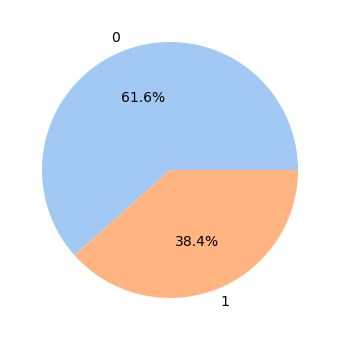

In [58]:
surived_count = cleaned_train["Survived"].value_counts()
surived_lable = surived_count.index
plt.pie(surived_count, labels=surived_lable, autopct='%.1f%%')
plt.show()

0 为未幸存，1为幸存。 可以看出泰坦尼克上未幸存的人数更多

### 乘客年龄

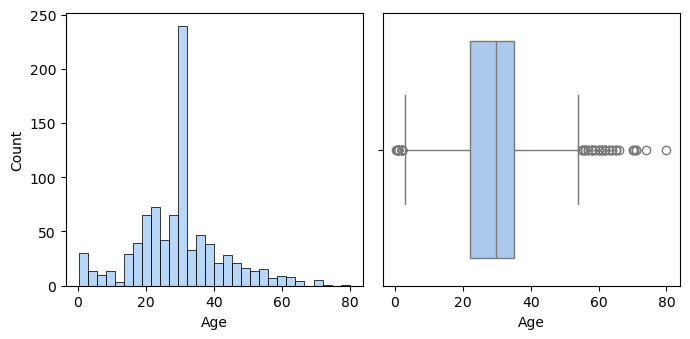

In [61]:
fiugre, axes = plt.subplots(1,2)
sns.histplot(cleaned_train, x='Age', ax=axes[0])
sns.boxplot(cleaned_train, x='Age', ax=axes[1])
plt.show()

大多数乘客年龄位于20岁到40岁之间，但有不少老年乘客以及婴儿

### 乘客年龄是否幸存

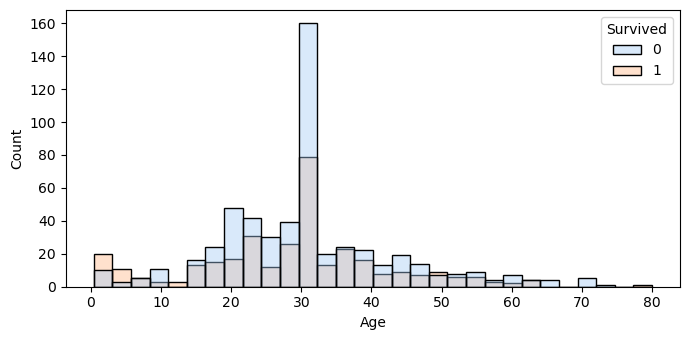

In [64]:
sns.histplot(cleaned_train,x="Age", hue="Survived", alpha=0.4)
plt.show()

 0-20以下的小孩的幸存率高。50-60岁老年人的幸存高。20-30的幸存率最低

### 船票金额分布

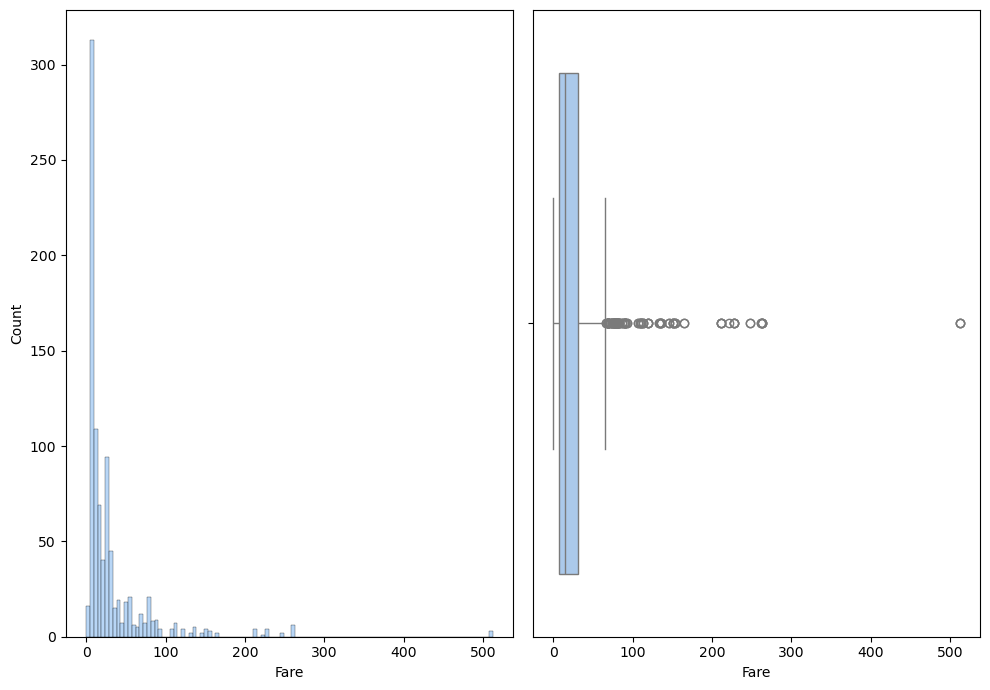

In [67]:
fiugre, axes = plt.subplots(1, 2, figsize=[10,7])
sns.histplot(cleaned_train, x='Fare', ax=axes[0])
sns.boxplot(cleaned_train, x='Fare', ax=axes[1])
plt.show()

大部分的票价比较低，但是也有很高的票价的票。拉高了整体票价

### 票价于生存率

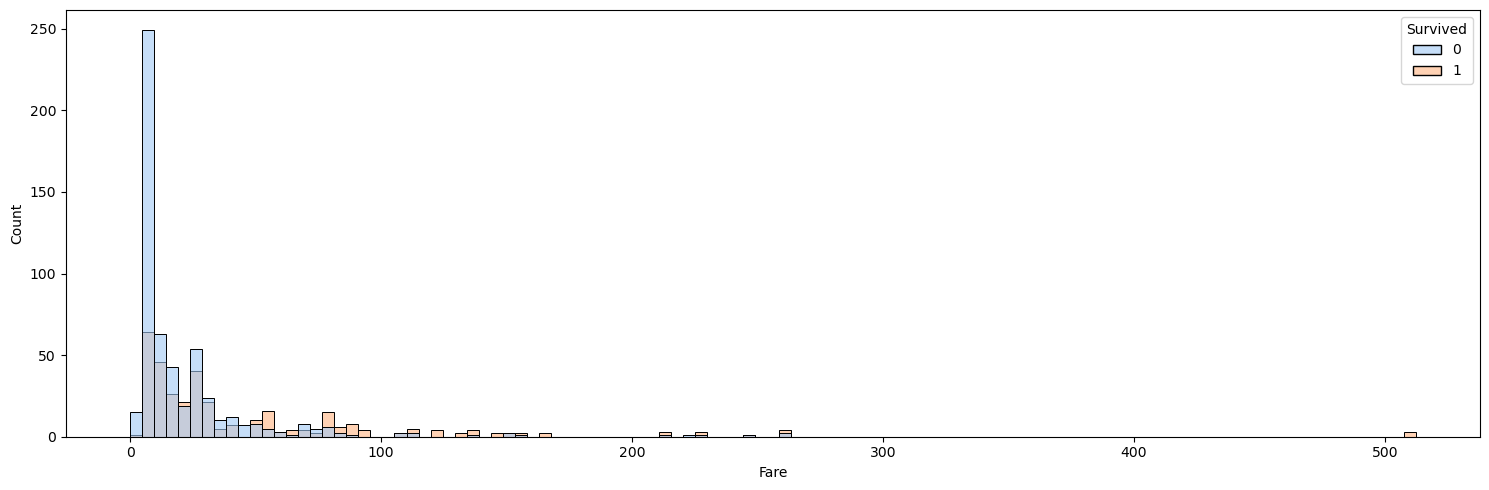

In [70]:
plt.subplots(1, 1, figsize=[15,5])
sns.histplot(cleaned_train, x="Fare", hue="Survived", alpha=0.6)
plt.show()

可以看出票价越高，生存率越高。

### 船舱等级于生存率

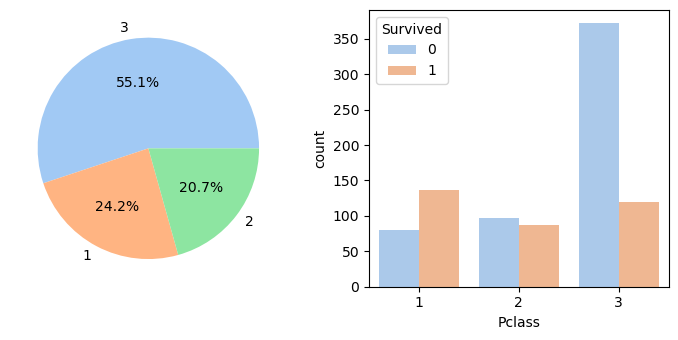

In [73]:
figure, axes = plt.subplots(1,2)
plclass_count = cleaned_train["Pclass"].value_counts()
plclass_lables = plclass_count.index
axes[0].pie(plclass_count, labels=plclass_lables, autopct='%.1f%%')
sns.countplot(cleaned_train, x='Pclass', hue='Survived', ax=axes[1])
plt.show()

3等舱的乘客的幸存率最低，一等舱的乘客幸存最高。所有船舱等级对生存率影响很大。

### 性别于幸存率

<Axes: xlabel='Sex', ylabel='count'>

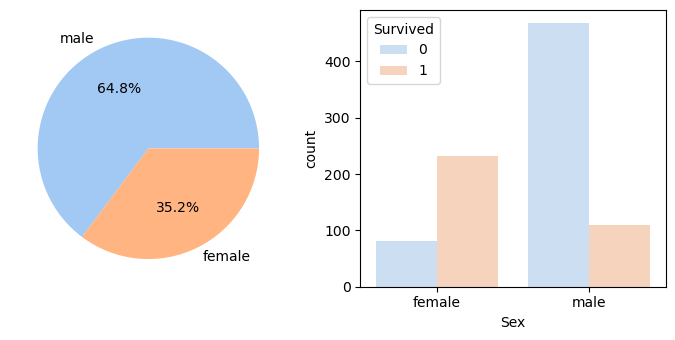

In [76]:
figure, axes=plt.subplots(1,2)
sex_count = cleaned_train["Sex"].value_counts()
sex_labels = sex_count.index
axes[0].pie(sex_count, labels=sex_labels, autopct='%.1f%%')
sns.countplot(cleaned_train, x="Sex", hue="Survived", alpha=0.6, ax=axes[1])

男性的生存率比女性低。看来有先让妇孺于老人先上救生船

### 登船口于幸存率

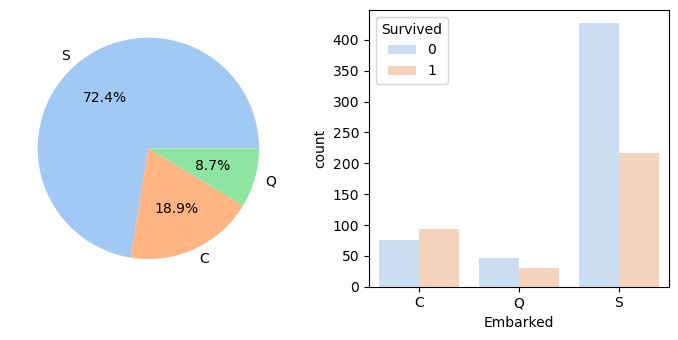

In [79]:
figure, axes=plt.subplots(1,2)
embarked_count = cleaned_train["Embarked"].value_counts()
embarked_labels = embarked_count.index
axes[0].pie(embarked_count, labels=embarked_labels, autopct='%.1f%%')
sns.countplot(cleaned_train, x="Embarked", hue="Survived", alpha=0.6, ax=axes[1])
plt.show()

南安普敦登船口幸存率最低，皇后镇幸存率最高

### 家庭成员于幸存率

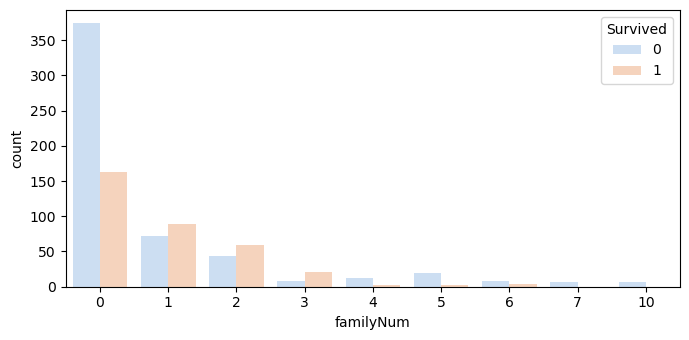

In [82]:
sns.countplot(cleaned_train, x="familyNum", hue="Survived", alpha=0.6)
plt.show()

家庭成员越多，生存率越低

## 分析数据

在分析步骤中，我们将利用以上清理后到的数据，进行逻辑回归分析，目标是得到一个可以根据泰坦尼克号乘客各个属性，对沉船事件后幸存情况进行预测的数学模型。

先引入做逻辑回归所需的模块。

In [86]:
import statsmodels.api as sm

创建`lr_train`DataFrame来对数据进行分析。和原数据分开，因为要创建虚拟变量等。不把原数据弄乱

In [88]:
lr_trian = cleaned_train.copy()
lr_trian.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


移除大概率不会影响乘客幸存概率的变量。

In [90]:
lr_trian = lr_trian.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)
# lr_trian = lr_trian.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
lr_trian.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,familyNum
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


把分类变量，转变为虚拟变量

In [92]:
lr_trian = pd.get_dummies(lr_trian,  drop_first=True, columns=['Pclass', 'Sex'], dtype=int)
lr_trian.head()

,Survived,Age,SibSp,Parch,Fare,familyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,1


接下来，要把因变量和自变量划分出来。

因变量是Survived变量，进行逻辑回归的目的，是根据其它可能对乘客生还概率有影响的变量，来预测幸存情况。

In [94]:
y = lr_trian["Survived"]

但需要查看于其他变量于Survived它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性

In [96]:
X = lr_trian.drop(['Survived'], axis=1)
X.corr()

,Age,SibSp,Parch,Fare,familyNum,Pclass_2,Pclass_3,Sex_male
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.006589,-0.281004,0.084153
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.055932,0.092548,-0.114631
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.000734,0.015790,-0.245489
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,-0.118557,-0.413333,-0.182333
familyNum,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.038594,0.071142,-0.200988
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,1.000000,-0.565210,-0.064746
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,0.071142,-0.565210,1.000000,0.137143
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,-0.064746,0.137143,1.000000


一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可。

In [98]:
X.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,familyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
familyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


`familyNum` 与 `SibSp` 大于 0.8 

删除掉 `SibSP`。同时观察的值 `Parch`的值为0.78也非常接近0.8本来 familyNum就是通过这两个值的获得的。所有相关性会比较高。
因为要讨论家庭人数和幸存率。保留家庭人数总和就好。

In [101]:
X = X.drop(["SibSp", "Parch"], axis = 1)

接下来，给模型的线性方程添加截距。

In [103]:
X = sm.add_constant(X)

下一步就可以调用`Logit`函数，利用最大似然优化来得到逻辑回归模型的参数值，并输出总结信息。

In [105]:
modle = sm.Logit(y,X).fit()
modle.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 15 Jul 2024   Pseudo R-squ.:                  0.3339
Time:                        12:25:57   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
familyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为船票价格对乘客幸存概率没有显著性影响。因此可以把这个变量移除后，再次建立逻辑回归模型。

In [107]:
X = X.drop(['Fare'],axis=1)
modle = sm.Logit(y,X).fit()
modle.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 Jul 2024   Pseudo R-squ.:                  0.3323
Time:                        12:25:57   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
familyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

逻辑回归模型预测以下因素的增加（或存在）会降低幸存概率：年龄、同乘家庭成员数、不在一等舱、性别为男性。

要理解各个各个自变量系数的实际含义，我们需要计算自然常数的次方。

In [153]:
#age
np.exp(0.0395)

1.040290498884958

年龄每增加1岁，生还概率降低4%左右。

In [161]:
#familyNum
np.exp(-0.2186)

0.803643111115195

每增加一名家庭成员，生还率降低20%左右

In [167]:
#Pclass_2
np.exp(-1.1798)

0.30734020049483596

二等舱比一等舱低70%左右

In [176]:
# Pclass_3
np.exp(-2.3458)

0.09577055503172162

三等舱比一等舱生存率低了90%多 

In [179]:
# Sex_male
np.exp(-2.7854)

0.061704402333015156

男性比女性生存率低了94%左右

以上结果说明，男性乘客的生还概率比女性乘客低94%左右。

根据模型参数值，我们总结：
- 年龄小的乘客幸存概率更高；
- 女性乘客的生还率比男性乘客的幸存概率更高；
- 来自的船舱等级高的乘客幸存概率更高；
- 同乘家庭成员少的乘客幸存概率更高。

得到模型后，继续预测`titanic_test.csv`中的乘客生还情况

先导入`titanic_test.csv`

In [191]:
tt_test = pd.read_csv("titanic_test.csv")
tt_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


由于逻辑回归模型不允许数据中有缺失值，因此我们需要检查titanic_test是否存在数据缺失。

In [194]:
tt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


可以看出`Age`, `Fare`, `Cabin`中有丢失值。

`Fare`, `Cabin`因为不影响最后预测结果。`Age`用之前一样的方法插入平均值

In [203]:
tt_test["Age"] = tt_test["Age"].fillna(tt_test["Age"].mean())
tt_test["Age"].isnull().sum()

0

把分类变量先转换为`Category`后转换为虚拟变量。如果没有转换为虚拟变量可能会出现预测数据包含不全，漏掉数据等问题。

In [210]:
tt_test['Pclass'] =pd.Categorical(tt_test['Pclass'], categories=['1', '2', '3'])
tt_test["sex"] = pd.Categorical(tt_test["Sex"], categories=['female', 'male'])
tt_test["Embarked"] = pd.Categorical(tt_test["Embarked"], categories=['C', 'Q', 'S'])

下一步，给模型用到的分类变量引入虚拟变量。

In [215]:
tt_test = pd.get_dummies(tt_test, drop_first = True, columns=['Pclass', 'Sex'], dtype=int)

In [219]:
tt_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,male,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,female,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,male,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,male,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,female,0,0,0


查看一下模型需要的输入变量。

In [224]:
modle.params

const        4.061982
Age         -0.039495
familyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

加入`famliyNum`这个值，和train中的文件吻合

In [227]:
tt_test["familyNum"] = tt_test["SibSp"] + tt_test["Parch"]
tt_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex,Pclass_2,Pclass_3,Sex_male,familyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,male,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,female,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,male,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,male,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,female,0,0,0,2


接下来构建我们要输入给模型进行预测的变量，需要和模型训练时的输入一致。

In [230]:
X_test = tt_test[['Age', 'familyNum', 'Pclass_2', 'Pclass_3', 'Sex_male']]
X_test = sm.add_constant(X_test)

现在就可以调用逻辑回归模型的`predict`方法，获得预测的幸存概率。

In [233]:
predict_value = modle.predict(X_test)
predict_value

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

概率大于0.5为幸存。再次查看后得出结果

In [236]:
predict_value > 0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool